# Prediction using Supervised Learning

### Prediction of Marks using the number of hours student studies

In [4]:
#importing libraries required in project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#reading data from remote link
url='http://bit.ly/w-data'
s_data=pd.read_csv(url)
print('Data imported succesfully')
s_data.head(10)

Data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##### lets plot our data points o 2-d graph to eyeball our dataset and see if we can manually find any relationship between the data We can create the plot with following script

In [ ]:
#plotting the distributions of scores
s_data.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

## Preparing the data

The next Step is to divide the data into attributes(input) and label (output)

In [32]:
x=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values
#print(x,y)

So now we have our attributes and label, lets divide the data into training and testing data, so we will be doing this with the help of scikit learn library with method train_test_split() method

In [41]:
from sklearn.model_selection import train_test_split
#20 percent of data is used for testing and other 80% is used for training
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=0)
#print(x_train)
#print(x_test)

## Training the Algorithm

We have divided our data into training and testing data set now its time to train our model using algorithm

In [47]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
#fit function is used to train the data set
regressor.fit(x_train,y_train)
print("Training completed")

Training completed


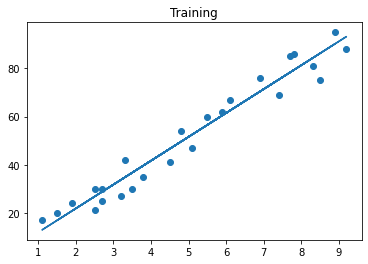

In [54]:
#plotting the regression line
#regression line is straight line to sure that data is 
line=regressor.coef_*x+regressor.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.title("Training")
plt.show()

## Making Predictions

Now we have trained our data now its time to make some predictions

In [58]:
print(x_test) #testing data in hours
y_pred=regressor.predict(x_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [63]:
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [67]:
score_pred=np.array([9.25])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print("No of hours : {}".format(9.25))
print("Predicted Score : {}".format(predict[0]))

No of hours : 9.25
Predicted Score : 93.69173248737538


## Evaluating the model

Final step is to evaluate the performace of algorithm. this step is to compare how different algorithms perform well on data set.For simplicity we have choose mean square error. there are many such metrices. 

In [73]:
from sklearn import metrics
print("Mean Absolute Error ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error  4.18385989900298
